In [1]:
import yaml
import torch
import random
import numpy as np
import pandas as pd
from unet import UNet
from ddpm import DDPM
import matplotlib.pyplot as plt

In [2]:
loss = pd.read_csv('/home/woody/iwso/iwso089h/diffusion/logs/loss_history.csv', index_col=0)

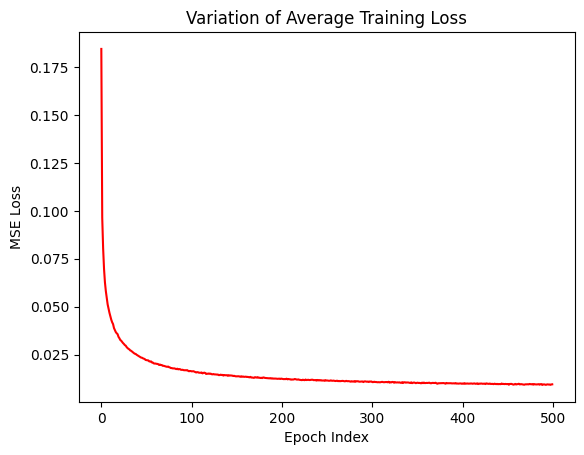

In [3]:
plt.plot(loss["Loss"], color='r')
plt.ylabel('MSE Loss')
plt.xlabel('Epoch Index')
plt.title('Variation of Average Training Loss')
plt.savefig('./upload_plots/loss.png', dpi=200, bbox_inches='tight')
plt.show()

In [4]:
#read yaml file
with open('config.yaml') as file:
  config = yaml.safe_load(file)

# Setting reproducibility
SEED = config['seed']
random.seed(SEED)
np.random.seed(SEED)
torch.manual_seed(SEED)

device = "cuda" if torch.cuda.is_available() else "cpu"

In [5]:
model = UNet(in_ch=config['in_ch'], 
             out_ch=config['out_ch'], 
             time_dim=config['time_dim'],
             device=device)
model.to(device);

In [6]:
PATH = '/home/woody/iwso/iwso089h/diffusion/checkpoints/unet.pth'
model.load_state_dict(torch.load(PATH))

<All keys matched successfully>

In [7]:
ddpm = DDPM(beta_start=config['beta_start'], 
            beta_end=config['beta_end'], 
            steps=config['steps'], 
            color_channels=config['color_channels'], 
            image_size=config['image_size'], 
            device=device)

In [8]:
sampled_images = ddpm.backward_diffusion(model, 64)

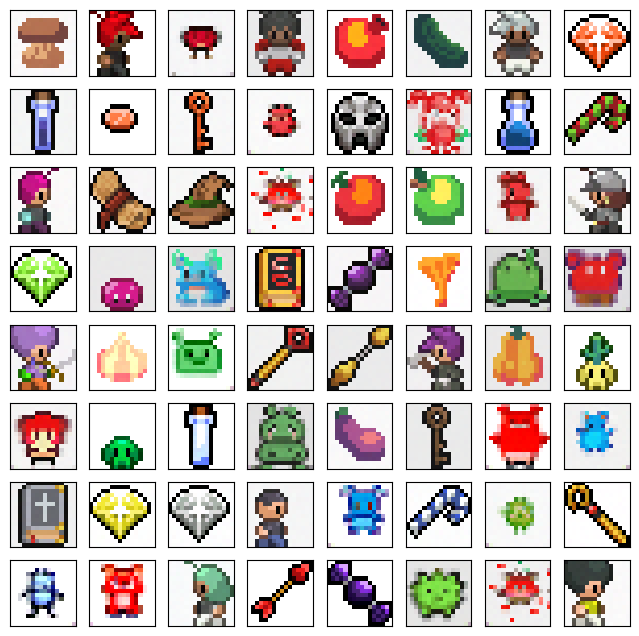

In [9]:
fig, ax = plt.subplots(8, 8, figsize=(8, 8))
ax = ax.ravel()

for i in range(len(ax)):
    ax[i].imshow(sampled_images[i].permute(1, 2, 0).cpu())
    ax[i].set_xticks([])
    ax[i].set_yticks([])

plt.savefig('./upload_plots/generated_images1.png', dpi=200, bbox_inches='tight')
plt.show()

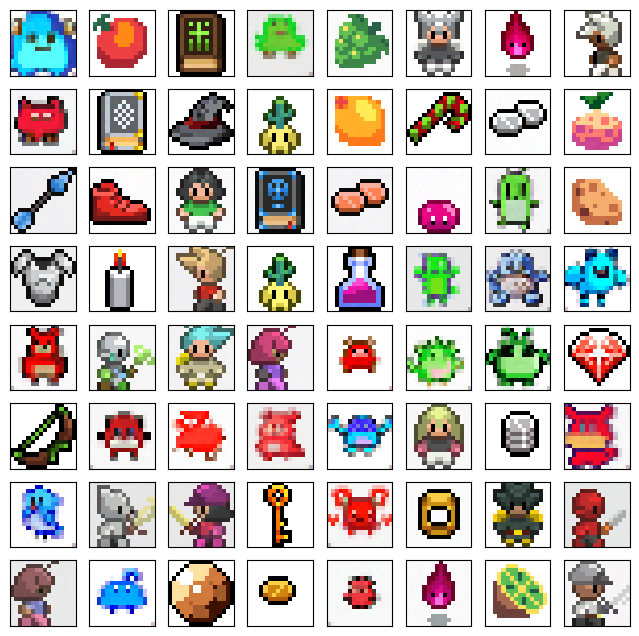

In [10]:
sampled_images = ddpm.backward_diffusion(model, 64)
fig, ax = plt.subplots(8, 8, figsize=(8, 8))
ax = ax.ravel()

for i in range(len(ax)):
    ax[i].imshow(sampled_images[i].permute(1, 2, 0).cpu())
    ax[i].set_xticks([])
    ax[i].set_yticks([])

plt.savefig('./upload_plots/generated_images2.png', dpi=200, bbox_inches='tight')
plt.show()

In [11]:
sprites = torch.tensor(np.load('sprites_1788_16x16.npy')).to(device)
sprites = sprites.permute(0, 3, 2, 1)/255.
random_indices = torch.randint(low=0, high=sprites.shape[0], size=(128,))

sprites1 = sprites[random_indices[:64]]
sprites2 = sprites[random_indices[64:]]

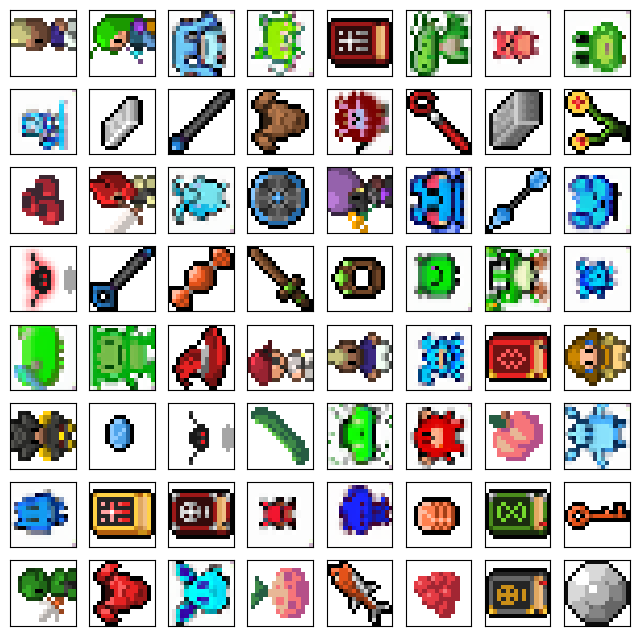

In [12]:
fig, ax = plt.subplots(8, 8, figsize=(8, 8))
ax = ax.ravel()

for i in range(len(ax)):
    ax[i].imshow(sprites1[i].permute(1, 2, 0).cpu())
    ax[i].set_xticks([])
    ax[i].set_yticks([])

plt.savefig('./upload_plots/sprites1.png', dpi=200, bbox_inches='tight')
plt.show()

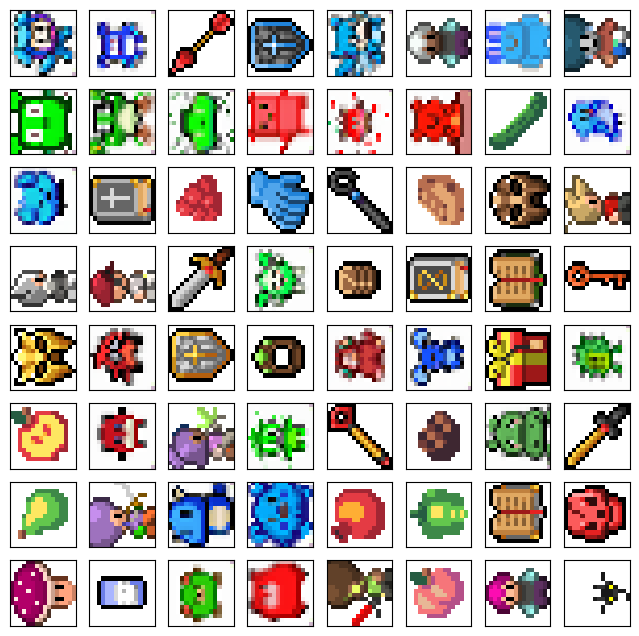

In [13]:
fig, ax = plt.subplots(8, 8, figsize=(8, 8))
ax = ax.ravel()

for i in range(len(ax)):
    ax[i].imshow(sprites2[i].permute(1, 2, 0).cpu())
    ax[i].set_xticks([])
    ax[i].set_yticks([])

plt.savefig('./upload_plots/sprites2.png', dpi=200, bbox_inches='tight')
plt.show()